In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Filter:
    def __init__(self, max_samples):
        self.maxsize = max_samples
        self.current_size = 0
        self.data = []
        self.idx = 0
    
    def add(self, value):
        if self.current_size < self.maxsize:
            # filling up the cyclic buffer
            self.data.append(value)
            self.idx += 1
            self.current_size += 1
        else:
            # adding value to a full cyclic buffer, oldest value goes out
            self.data[self.idx % self.maxsize] = value
            self.idx = self.idx % self.maxsize + 1
            
    def avg(self):
        # TODO: caching walking sum
        if self.current_size:
            return sum(self.data) / self.current_size
        else:
            return 0.0
    
    def __str__(self):
        return f'Filter: max_samples={self.maxsize}, currentsize={self.current_size}, idx={self.idx}, d={self.data}'

In [11]:
f = Filter(max_samples=3)
testdata = [1, 2, 2, 3, 4, 5, 6]

for i in testdata:
    f.add(i)
    print(f'added value={i}, filter state={f}, avg={f.avg()}')


added value=1, filter state=Filter: max_samples=3, currentsize=1, idx=1, d=[1], avg=1.0
added value=2, filter state=Filter: max_samples=3, currentsize=2, idx=2, d=[1, 2], avg=1.5
added value=2, filter state=Filter: max_samples=3, currentsize=3, idx=3, d=[1, 2, 2], avg=1.6666666666666667
added value=3, filter state=Filter: max_samples=3, currentsize=3, idx=1, d=[3, 2, 2], avg=2.3333333333333335
added value=4, filter state=Filter: max_samples=3, currentsize=3, idx=2, d=[3, 4, 2], avg=3.0
added value=5, filter state=Filter: max_samples=3, currentsize=3, idx=3, d=[3, 4, 5], avg=4.0
added value=6, filter state=Filter: max_samples=3, currentsize=3, idx=1, d=[6, 4, 5], avg=5.0


In [40]:
def plotme(buffsize, freq1, amp1, freq2, amp2, filter1_size, filter2_size):
    x = np.linspace(0, np.pi/2, buffsize)

    y = amp1*np.sin(freq1*x) + amp2 * np.sin(x*freq2) # low and high frequency signal
    
    # TODO: remove?
    for i in range(100): y[i] = 0
    for i in range(100,150): y[i] = .1
    #
    
    y_flt1 = np.zeros(buffsize)
    y_flt2 = np.zeros(buffsize)

    flt1 = Filter(filter1_size)
    flt2 = Filter(filter2_size)

    for i,v in enumerate(y):
        flt1.add(v)
        flt2.add(v)
        y_flt1[i] = flt1.avg()
        y_flt2[i] = flt2.avg()

    plt.figure(figsize=(12,6))
    plt.plot(x,y, linewidth=1, color='red', label='Original signal')
    plt.plot(x,y_flt1, linewidth=2, color='green', label=f'Filtered signal ({filter1_size})')
    plt.plot(x,y_flt2, linewidth=2, label=f'Filtered signal ({filter2_size})')
    plt.legend()
    plt.grid(True)

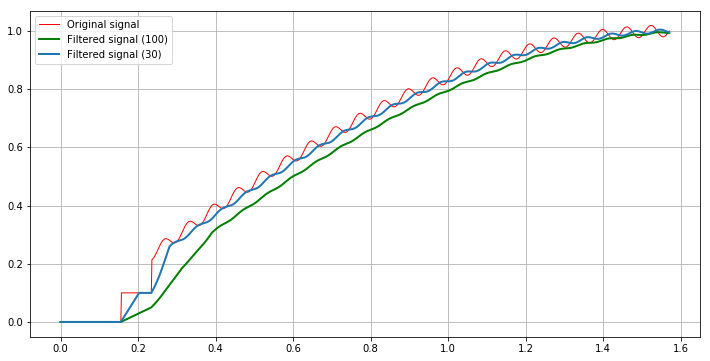

In [41]:
plotme(buffsize=1000, freq1=1, amp1=1, freq2=100, amp2=0.02, filter1_size=100, filter2_size=30)

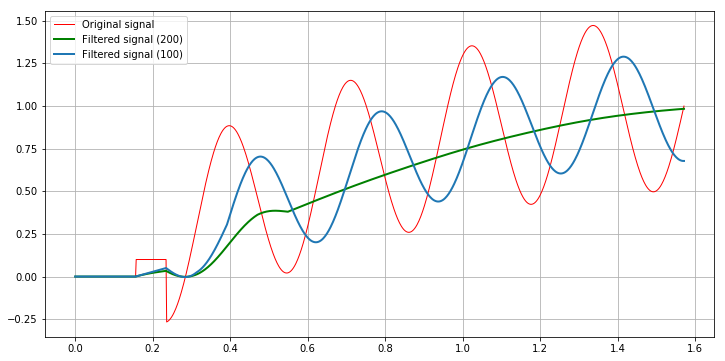

In [44]:
plotme(buffsize=1000, freq1=1, amp1=1, freq2=20, amp2=0.5, filter1_size=200, filter2_size=100)